In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from portfolio import Portfolio
import yfinance as yf
import datetime
from plotly.subplots import make_subplots

profolio = Portfolio('Firstrade')
profolio.from_csv('data/FT_CSV_87748402.csv')

In [2]:
from chart import Chart
new_chart = Chart(profolio)
new_chart.ROE_DayHeld()
new_chart.WinRate_GainLose()
#new_chart.Monthly_Return()
new_chart.ROI_Compare()
#new_chart.Storage_Share()
new_chart.Total_Value()

c:\Users\USER\OneDrive - 國立陽明交通大學\文件\stock\chart.py:42: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

c:\Users\USER\OneDrive - 國立陽明交通大學\文件\stock\chart.py:43: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Successfully connected to SQLite database
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Successfully created table
Successfully inserted data into table: ('2023-04-04', 'MSFT', 287.2300109863281, 290.44989013671875, 286.3299865722656, 288.3999938964844, 288.3999938964844, 13587517.0)
[*********************100%***********************]  3 of 3 completed
Successfully connected to SQLite database
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
value    TradeDate  Amount
0 2022-02-22  3981.0


Successfully connected to SQLite database
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Successfully created table
Successfully inserted data into table: ('2023-04-04', 'AMD', 97.03800201416016, 97.2699966430664, 95.7300033569336, 96.16000366210938, 96.16000366210938, 23370084.0)


In [3]:
profolio.stock_value

AttributeError: 'Portfolio' object has no attribute 'stock_value'

In [ ]:
profolio.cash_balance

c:\Users\USER\OneDrive - 國立陽明交通大學\文件\stock\profolio.py:185: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

c:\Users\USER\OneDrive - 國立陽明交通大學\文件\stock\profolio.py:159: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

c:\Users\USER\OneDrive - 國立陽明交通大學\文件\stock\profolio.py:196: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



TradeDate
2022-01-25    3500.000
2022-01-26    2731.910
2022-01-27    2344.300
2022-01-28    2029.810
2022-01-31     910.510
                ...   
2023-03-09    1068.520
2023-03-10     336.770
2023-03-13    -455.930
2023-03-14    -950.490
2023-03-15    -949.762
Name: Amount, Length: 154, dtype: float64

In [ ]:
df = pd.DataFrame(profolio.principal)
df['Cash'] = profolio.cash_balance
df['Stock'] = profolio.stock_value
df = df.ffill()
df = df.fillna(0)
df['Total_Value'] = df['Cash']+df['Stock']
df['ROR'] = df['Total_Value']/df['Principal']
df

c:\Users\USER\OneDrive - 國立陽明交通大學\文件\stock\profolio.py:169: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

c:\Users\USER\OneDrive - 國立陽明交通大學\文件\stock\profolio.py:185: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

c:\Users\USER\OneDrive - 國立陽明交通大學\文件\stock\profolio.py:159: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

c:\Users\USER\OneDrive - 國立陽明交通大學\文件\stock\profolio.py:196: FutureWarning:

The default value of numeric_o

,Principal,Cash,Stock,Total_Value,ROR
2022-01-25,3500.00,3500.000,0.000000,3500.000000,1.000000
2022-01-26,3500.00,2731.910,746.377670,3478.287670,0.993796
2022-01-27,3500.00,2344.300,1135.714279,3480.014279,0.994290
2022-01-28,3500.00,2029.810,1475.514275,3505.324275,1.001521
2022-01-31,3500.00,910.510,2120.809631,3031.319631,0.866091
...,...,...,...,...,...
2023-03-13,9960.73,-455.930,9672.990187,9217.060187,0.925340
2023-03-14,9960.73,-950.490,10317.250092,9366.760092,0.940369
2023-03-15,9960.73,-949.762,10309.060053,9359.298053,0.939620
2023-03-16,9960.73,-949.762,4979.762444,4030.000444,0.404589


<Axes: >

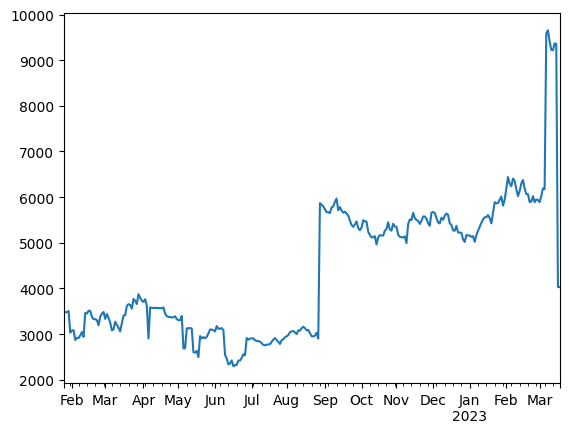

In [ ]:
df['Total_Value'].plot()

<Axes: >

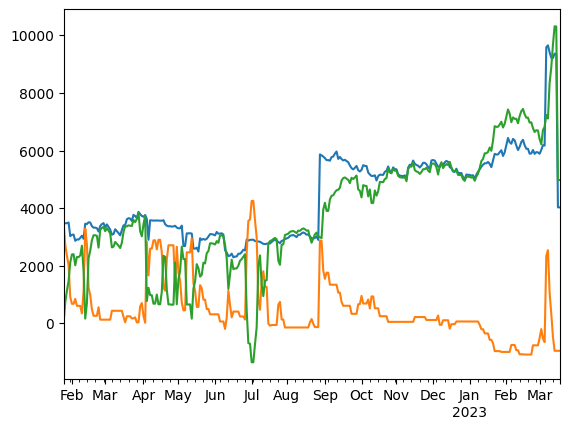

In [ ]:
df['Total_Value'].plot()
df['Cash'].plot()
df['Stock'].plot()

In [ ]:
benchmark = yf.download(['^DJI','^GSPC','^IXIC'])
benchmark = pd.DataFrame(benchmark['Adj Close'])
benchmark.index = pd.DatetimeIndex(benchmark.index)
df[['^DJI','^GSPC','^IXIC']] = benchmark[['^DJI','^GSPC','^IXIC']]
print(df)
df[['^DJI','^GSPC','^IXIC']] = df[['^DJI','^GSPC','^IXIC']]/df.iloc[0][['^DJI','^GSPC','^IXIC']]
df[['^DJI','^GSPC','^IXIC']] =df[['^DJI','^GSPC','^IXIC']].ffill()
print(df)

[*********************100%***********************]  3 of 3 completed
            Principal      Cash         Stock  Total_Value       ROR  \
2022-01-25    3500.00  3500.000      0.000000  3500.000000  1.000000   
2022-01-26    3500.00  2731.910    746.377670  3478.287670  0.993796   
2022-01-27    3500.00  2344.300   1135.714279  3480.014279  0.994290   
2022-01-28    3500.00  2029.810   1475.514275  3505.324275  1.001521   
2022-01-31    3500.00   910.510   2120.809631  3031.319631  0.866091   
...               ...       ...           ...          ...       ...   
2023-03-13    9960.73  -455.930   9672.990187  9217.060187  0.925340   
2023-03-14    9960.73  -950.490  10317.250092  9366.760092  0.940369   
2023-03-15    9960.73  -949.762  10309.060053  9359.298053  0.939620   
2023-03-16    9960.73  -949.762   4979.762444  4030.000444  0.404589   
2023-03-17    9960.73  -949.762   4979.762444  4030.000444  0.404589   

                    ^DJI        ^GSPC         ^IXIC  
2022-01-25  

In [ ]:
[px.colors.qualitative.Plotly[1]].append(px.colors.qualitative.Pastel1[0:3])

In [ ]:
df.index

DatetimeIndex(['2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03',
               '2022-02-04', '2022-02-07',
               ...
               '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09',
               '2023-03-10', '2023-03-13', '2023-03-14', '2023-03-15',
               '2023-03-16', '2023-03-17'],
              dtype='datetime64[ns]', length=299, freq='B')

In [ ]:
color = [px.colors.qualitative.Plotly[1]]
color = color + px.colors.qualitative.Pastel1[0:3]
fig = px.line(
    df[['ROR', '^DJI','^GSPC','^IXIC']],
    color_discrete_sequence=color)

fig.update_traces(mode="lines", hovertemplate=None)
fig.update_layout(xaxis_title="", yaxis_title="ROI", yaxis_tickformat = '.2%')
#fig.update_xaxes(title='x', visible=False, showticklabels=False, row=1, col=1)
fig.update_layout(hovermode="x")
fig.update_layout(legend_title_text='ROI')
#fig.add_bar(y=Return[Return['return']>=0]['return'],x=Return[Return['return']>=0]['return'].index,marker={'color':'#EF553B'}, row=2, col=1,name='earn', showlegend=False)
#fig.add_bar(y=Return[Return['return']<0]['return'],x=Return[Return['return']<0].index,marker={'color':'#00CC96'}, row=2, col=1,name='lost', showlegend=False)
fig.show()

In [ ]:
df = yf.download('^IXIC')


[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0
...,...,...,...,...,...,...
2023-03-09,11578.309570,11667.120117,11319.980469,11338.349609,11338.349609,5061790000
2023-03-10,11325.360352,11373.809570,11093.860352,11138.889648,11138.889648,6193500000
2023-03-13,11041.459961,11326.730469,10982.799805,11188.839844,11188.839844,6201490000


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0
...,...,...,...,...,...,...
2023-03-09,11578.309570,11667.120117,11319.980469,11338.349609,11338.349609,5061790000
2023-03-10,11325.360352,11373.809570,11093.860352,11138.889648,11138.889648,6193500000
2023-03-13,11041.459961,11326.730469,10982.799805,11188.839844,11188.839844,6201490000


In [ ]:
df['close_1'] = df['Adj Close'].shift(1)

In [ ]:
df['grow'] = (df['Adj Close'] - df['close_1'])/df['close_1']

In [ ]:
df['grow'].value_counts(sort=True).sort_index().iloc[-10:]

0.078737    1
0.079364    1
0.081215    1
0.081228    1
0.089212    1
0.093460    1
0.095338    1
0.104769    1
0.118059    1
0.141732    1
Name: grow, dtype: int64

In [ ]:
df = df.sort_values('grow',ascending=False)
df.iloc[:15]

,Open,High,Low,Close,Adj Close,Volume,close_1,grow
Date,,,,,,,,
2001-01-03,2254.560059,2618.030029,2251.709961,2616.689941,2616.689941,3188000000,2291.860107,0.141732
2008-10-13,1734.599976,1844.250000,1715.739990,1844.250000,1844.250000,2665690000,1649.510010,0.118059
2000-12-05,2702.719971,2889.800049,2694.409912,2889.800049,2889.800049,2474670000,2615.750000,0.104769
2008-10-28,1552.239990,1649.469971,1504.130005,1649.469971,1649.469971,2777540000,1505.900024,0.095338
2020-03-13,7610.390137,7875.930176,7219.089844,7874.879883,7874.879883,4701070000,7201.799805,0.093460
2001-04-05,1709.910034,1785.729980,1706.099976,1785.000000,1785.000000,2333000000,1638.800049,0.089212
2001-04-18,2005.060059,2129.310059,1995.910034,2079.439941,2079.439941,3195650000,1923.219971,0.081228
2020-03-24,7196.149902,7418.370117,7169.859863,7417.859863,7417.859863,4441080000,6860.669922,0.081215
2000-05-30,3286.540039,3460.239990,3286.540039,3459.479980,3459.479980,1457360000,3205.110107,0.079364
